## In this project, a regression model will be used to predict the chance of admission into a particular university based on the student's profile.

#### Inputs (features):
- GRE scores (out of 340)
- TOFEL scores (out of 120)
- Uiversity rating (out of 5)
- Statement of Purpose (SOP)(out of 5)
- Letter of Recommendations (LOR) Strenght (out of 5)
- Undergraduate GPA (out of 10)
- Research experience (either 0 or 1)

#### Outputs:
- Chance of admission (ranging from 0 to 1)


In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from jupyterthemes import jtplot
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [2]:
admission_df = pd.read_csv('Admission_Predict.csv')
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
## drop the serial no column
admission_df.drop('Serial No.', axis=1, inplace= True)

In [4]:
admission_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## PERFORM EXPLORATORY DATA ANALYSIS

In [5]:
# checking the null values
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
# Check the dataframe information
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [7]:
# Statistical summary of the dataframe
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
# Grouping by University ranking 
df_university = admission_df.groupby(by = 'University Rating').mean()

In [9]:
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


## PERFORM DATA VISUALIZATION

array([[<AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>,
        <AxesSubplot:title={'center':'University Rating'}>],
       [<AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR '}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit'}>, <AxesSubplot:>]],
      dtype=object)

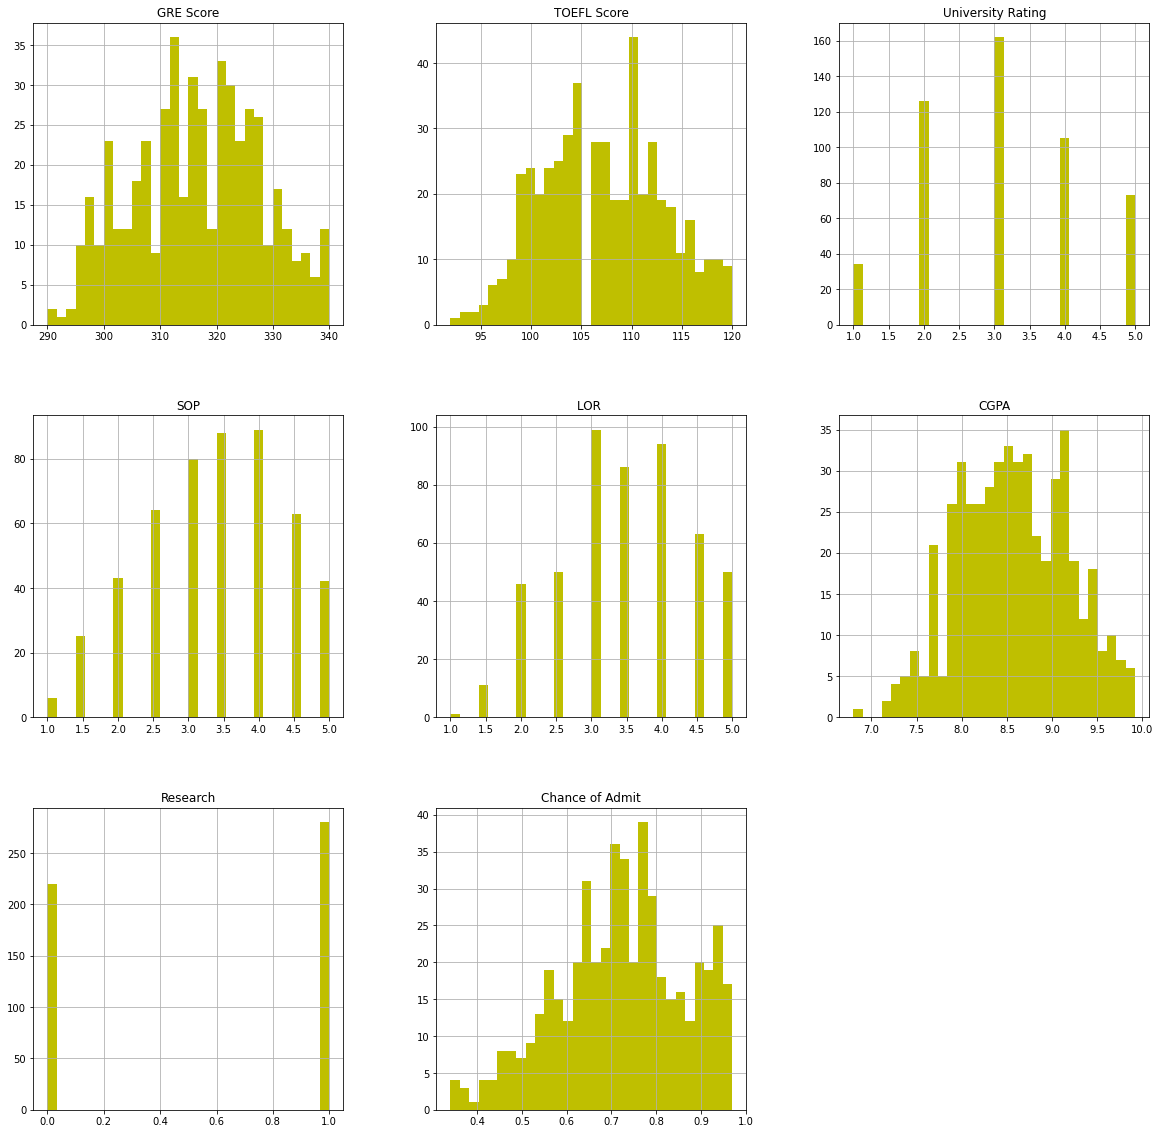

In [10]:
admission_df.hist(bins= 30, figsize=(20,20), color = 'y')

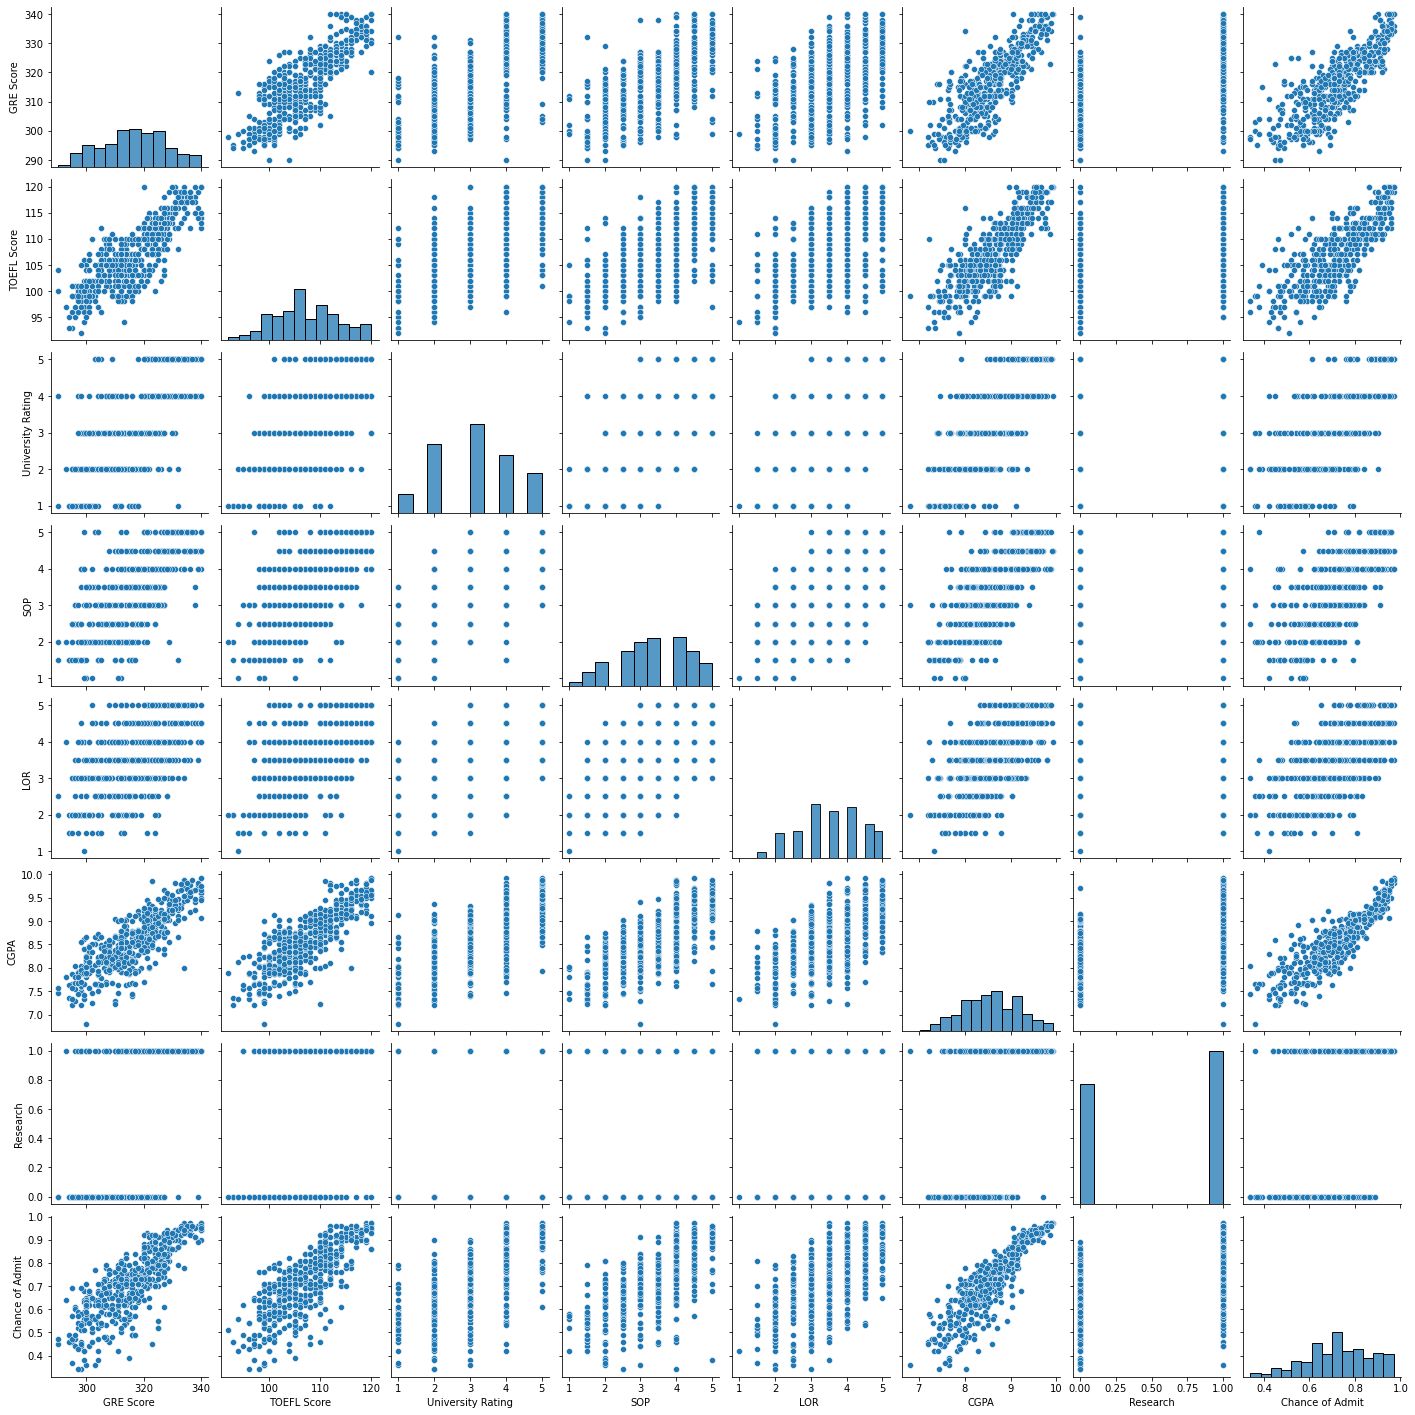

In [11]:
sns.pairplot(admission_df)

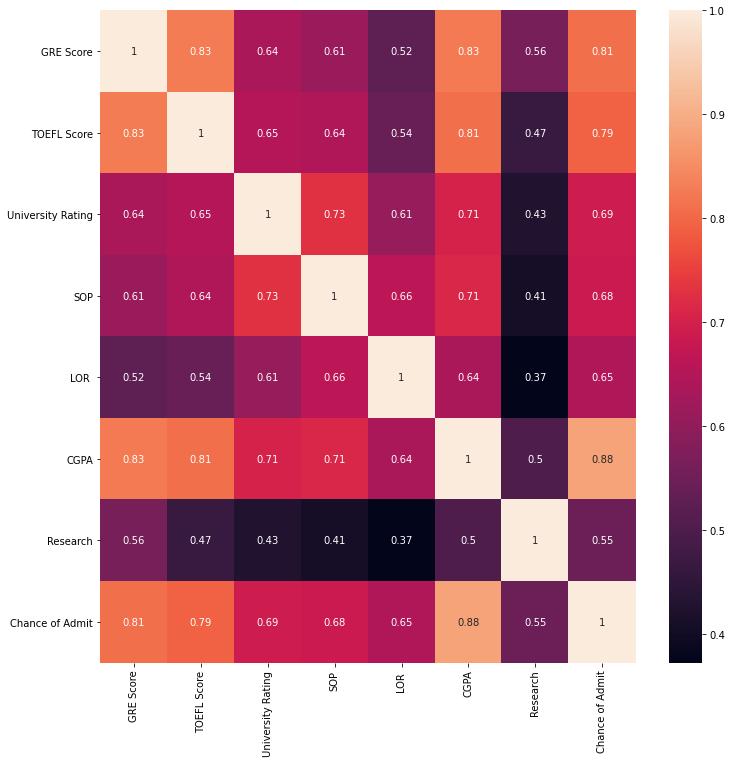

In [12]:
corr_matrix = admission_df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True)
plt.show()

### CREATE TRAINING AND TESTING DATASET

In [13]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [14]:
X = admission_df.drop(columns= 'Chance of Admit',axis=1)
y = admission_df['Chance of Admit']

In [15]:
print (X.shape, y.shape)

(500, 7) (500,)


In [16]:
X = X.values
y = y.values

In [17]:
y = y.reshape(-1,1)

In [18]:
# scaling the data before training the model
from sklearn.preprocessing import StandardScaler , MinMaxScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [19]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [21]:
## TRAIN AND EVALUATE A LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [22]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)

LinearRegression()

In [23]:
accuracy_linearReg = LinearRegression_model.score(X_test, y_test)
accuracy_linearReg

0.8491118108976572

## TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

C:\Users\John\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\John\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\John\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\John\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [25]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))


ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))

ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                400       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
____

In [26]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

In [27]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20)

Epoch 1/100
425/425 [==============================] - 0s 708us/sample - loss: 0.5665
Epoch 2/100
425/425 [==============================] - 0s 110us/sample - loss: 0.3312
Epoch 3/100
425/425 [==============================] - 0s 89us/sample - loss: 0.3315
Epoch 4/100
425/425 [==============================] - 0s 110us/sample - loss: 0.2961
Epoch 5/100
425/425 [==============================] - 0s 113us/sample - loss: 0.2689
Epoch 6/100
425/425 [==============================] - 0s 85us/sample - loss: 0.2820
Epoch 7/100
425/425 [==============================] - 0s 111us/sample - loss: 0.2208
Epoch 8/100
425/425 [==============================] - 0s 85us/sample - loss: 0.2711
Epoch 9/100
425/425 [==============================] - 0s 74us/sample - loss: 0.2459
Epoch 10/100
425/425 [==============================] - 0s 89us/sample - loss: 0.2251
Epoch 11/100
425/425 [==============================] - 0s 110us/sample - loss: 0.2224
Epoch 12/100
425/425 [==============================] - 0

425/425 [==============================] - 0s 89us/sample - loss: 0.1243
Epoch 96/100
425/425 [==============================] - 0s 95us/sample - loss: 0.1332
Epoch 97/100
425/425 [==============================] - 0s 113us/sample - loss: 0.1322
Epoch 98/100
425/425 [==============================] - 0s 101us/sample - loss: 0.1152
Epoch 99/100
425/425 [==============================] - 0s 73us/sample - loss: 0.1307
Epoch 100/100
425/425 [==============================] - 0s 126us/sample - loss: 0.1148


In [28]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

75/75 [==============================] - 0s 706us/sample - loss: 0.2060
Accuracy : 0.7940445439020792


In [29]:
epochs_hist.history.keys()

dict_keys(['loss'])

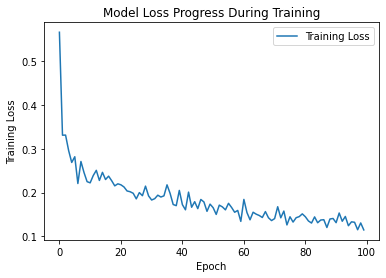

In [30]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

## TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS

In [31]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [32]:
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
accuracy_DecisionTree

0.589339629378043

In [33]:
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
RandomForest_model.fit(X_train, y_train)

C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(max_depth=10)

In [34]:
accuracy_RandomForest = RandomForest_model.score(X_test, y_test)
accuracy_RandomForest

0.7948566580566591

## CALCULATE REGRESSION MODEL KPIs

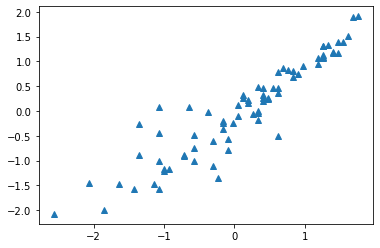

In [36]:
y_predict = LinearRegression_model.predict(X_test)
plt.plot(y_test, y_predict, '^')

In [38]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

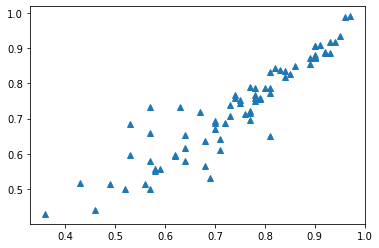

In [39]:
plt.plot(y_test_orig, y_predict_orig, '^')

In [40]:
k = X_test.shape[1]
n = len(X_test)
n

75

In [41]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 0.054 
MSE = 0.002930117191989435 
MAE = 0.039048605020358694 
R2 = 0.8491118108976572 
Adjusted R2 = 0.8333473732302482
